# Import Data

In [1]:
import yfinance as yf
import pandas as pd

tickers = ['^GSPC', '^IXIC', '^GDAXI', '^FTSE']
start_date = '1995-01-01'

new_data = pd.DataFrame()

for t in tickers:      
    new_data[t] = yf.download(t, start=start_date)['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [2]:
new_data

,^GSPC,^IXIC,^GDAXI,^FTSE
Date,,,,
1995-01-03,459.109985,743.580017,2068.919922,3065.699951
1995-01-04,460.709991,745.840027,2072.899902,3051.600098
1995-01-05,460.339996,745.659973,2051.459961,3032.300049
1995-01-06,460.679993,749.690002,2058.199951,3065.000000
1995-01-09,460.829987,752.090027,2053.409912,3055.800049
...,...,...,...,...
2024-12-24,6040.040039,20031.130859,NaN,8137.000000
2024-12-26,6037.589844,20020.359375,NaN,NaN
2024-12-27,5970.839844,19722.029297,19984.320312,8149.799805


In [12]:
# Renaming the columns correctly
new_data.rename(
    columns={
        '^GSPC': 'S&P 500',
        '^IXIC': 'Nasdaq',
        '^GDAXI': 'DAX 40',
        '^FTSE': 'FTSE 100'
    },
    inplace=True
)

new_data

,S&P 500,Nasdaq,DAX 40,FTSE 100
Date,,,,
1995-01-03,459.109985,743.580017,2068.919922,3065.699951
1995-01-04,460.709991,745.840027,2072.899902,3051.600098
1995-01-05,460.339996,745.659973,2051.459961,3032.300049
1995-01-06,460.679993,749.690002,2058.199951,3065.000000
1995-01-09,460.829987,752.090027,2053.409912,3055.800049
...,...,...,...,...
2024-12-24,6040.040039,20031.130859,NaN,8137.000000
2024-12-26,6037.589844,20020.359375,NaN,NaN
2024-12-27,5970.839844,19722.029297,19984.320312,8149.799805


# Normalization to 100

In [13]:
#Check first row
new_data.iloc[0]

S&P 500      459.109985
Nasdaq       743.580017
DAX 40      2068.919922
FTSE 100    3065.699951
Name: 1995-01-03 00:00:00, dtype: float64

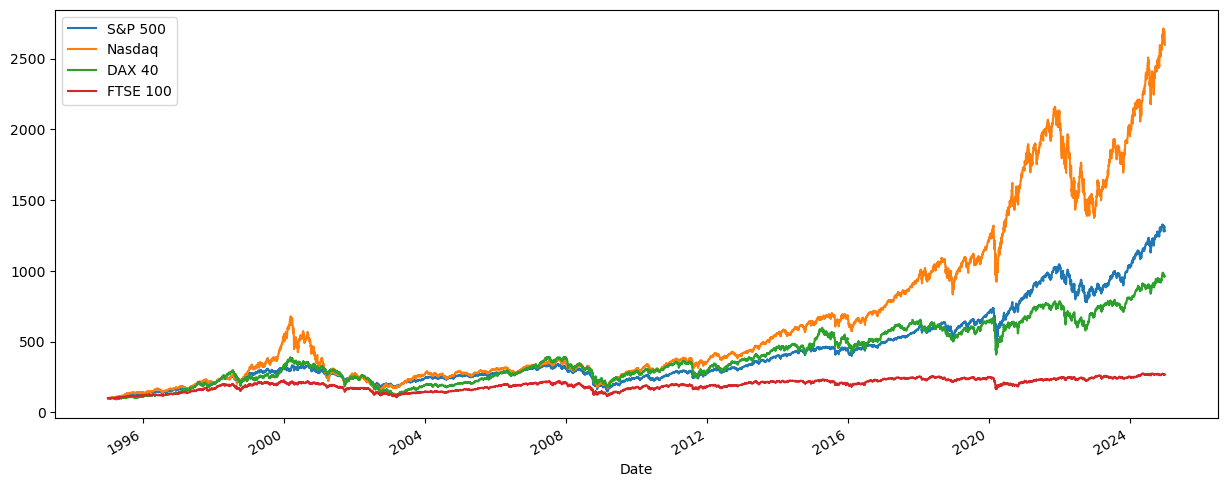

In [14]:
# .loc
import matplotlib.pyplot as plt
(new_data / new_data.loc['1995-01-03'] * 100).plot(figsize = (15,6))
plt.show()

# Calculate Index Return

In [15]:
Simple_Ret = (new_data / new_data.shift(1))-1

In [16]:
Simple_Ret

,S&P 500,Nasdaq,DAX 40,FTSE 100
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,0.003485,0.003039,0.001924,-0.004599
1995-01-05,-0.000803,-0.000241,-0.010343,-0.006325
1995-01-06,0.000739,0.005405,0.003285,0.010784
1995-01-09,0.000326,0.003201,-0.002327,-0.003002
...,...,...,...,...
2024-12-24,0.011043,0.013471,NaN,0.004233
2024-12-26,-0.000406,-0.000538,NaN,NaN
2024-12-27,-0.011056,-0.014901,NaN,NaN


In [35]:
ret_annual = Simple_Ret.mean()*250
ret_annual

S&P 500     0.102116
Nasdaq      0.137213
DAX 40      0.089181
FTSE 100    0.045665
dtype: float64

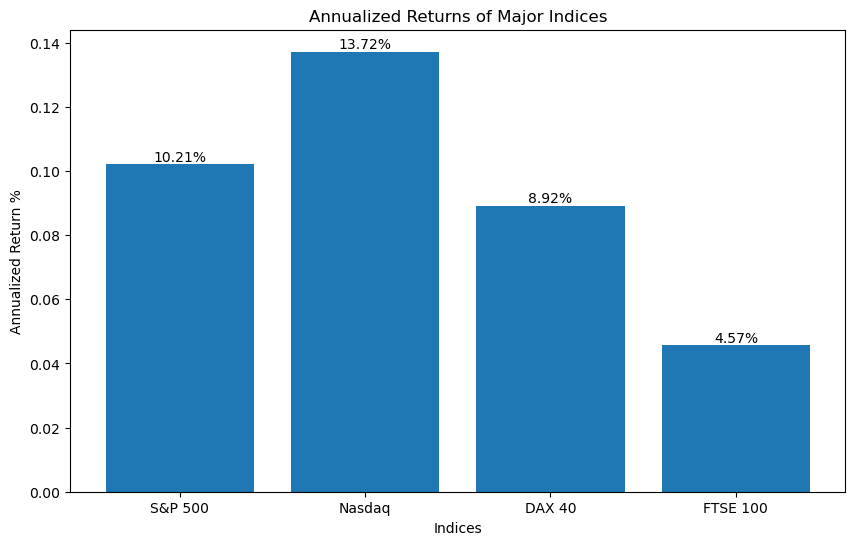

In [39]:
data = {
    'Indices': ret_annual.index,
    'Annualized Return': ret_annual
}
df = pd.DataFrame(data)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['Indices'], df['Annualized Return'])
plt.xlabel('Indices')
plt.ylabel('Annualized Return %')
plt.title('Annualized Returns of Major Indices')

# Adding text on top of bars
for i, val in enumerate(df['Annualized Return']):
    plt.text(i, val, f'{val:.2%}', ha='center', va='bottom')

plt.show()